<a href="https://colab.research.google.com/github/AmilaDarshanaJ/greenfuture-idea-analysis/blob/main/GreenFuture_IdeaAnalysis_R_SQL_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
install.packages("sqldf")
install.packages("ggplot2")
install.packages("dplyr")
library(sqldf)
library(ggplot2)
library(dplyr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plogr’, ‘gsubfn’, ‘proto’, ‘RSQLite’, ‘chron’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: gsubfn

Loading required package: proto

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: RSQLite


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [1]:
url <- "https://raw.githubusercontent.com/AmilaDarshanaJ/greenfuture-idea-analysis/refs/heads/main/greenfuture_ideas_dataset.csv"
data <- read.csv(url)

head(data)

,Employee.ID,Office.Location,Department,Idea.Submission.Date,Idea.Title,Idea.Category,Number.of.Votes,Collaboration.Status,Approval.Status,Implementation.Status,Security.Concern.Flag
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,587b45d8,Germany,Renewable Energy,16/04/2024,Idea 1,Sustainable Transport,231,Single Contributor,Pending,Not Started,No
2,0d3e8b8e,Canada,Renewable Energy,14/01/2024,Idea 2,Water Management,477,Cross-Regional Team,Approved,In Progress,No
3,fa012fe7,France,Environmental Policy,10/01/2025,Idea 3,Renewable Energy,48,Cross-Regional Team,Approved,Not Started,Yes
4,cb8ed680,Japan,Technology,24/12/2023,Idea 4,Circular Economy,330,Cross-Regional Team,Approved,Completed,No
5,333fff26,Australia,Technology,13/02/2025,Idea 5,Circular Economy,428,Single Contributor,Approved,Not Started,No
6,a34ebb0f,India,Technology,08/09/2024,Idea 6,Circular Economy,431,Single Contributor,Rejected,Not Started,No


In [2]:
# Insert 1: Add a new idea from Berlin office
new_idea1 <- data.frame(
  Employee.ID = 3001,
  Office.Location = "Berlin",
  Department = "Sustainability",
  Idea.Submission.Date = "2025-01-15",
  Idea.Title = "Urban Rooftop Farming",
  Idea.Category = "Agriculture",
  Number.of.Votes = 85,
  Collaboration.Status = "Yes",
  Approval.Status = "Pending",
  Implementation.Status = "Proposed",
  Security.Concern.Flag = "No"
)

# Insert 2: Add a new idea from Nairobi office
new_idea2 <- data.frame(
  Employee.ID = 3002,
  Office.Location = "Nairobi",
  Department = "Energy",
  Idea.Submission.Date = "2025-01-20",
  Idea.Title = "Solar Microgrids",
  Idea.Category = "Energy",
  Number.of.Votes = 90,
  Collaboration.Status = "No",
  Approval.Status = "Approved",
  Implementation.Status = "Implemented",
  Security.Concern.Flag = "Yes"
)

# Apply both inserts
data <- rbind(data, new_idea1, new_idea2)

# SELECT: Show inserted ideas
sql <- "SELECT * FROM data WHERE Employee.ID IN (3001, 3002)"

# UPDATE: Increase votes for "Solar Microgrids"
# Corrected column names: Number.of.Votes and Employee.ID
data$Number.of.Votes[data$Employee.ID == 3002] <- 100

# DELETE: Remove "Urban Rooftop Farming" idea (if required)
# Corrected column name: Employee.ID
data <- data[data$Employee.ID != 3001, ]

print(data[data$Employee.ID == 3002, ])

     Employee.ID Office.Location Department Idea.Submission.Date
3002        3002         Nairobi     Energy           2025-01-20
           Idea.Title Idea.Category Number.of.Votes Collaboration.Status
3002 Solar Microgrids        Energy             100                   No
     Approval.Status Implementation.Status Security.Concern.Flag
3002        Approved           Implemented                   Yes


In [8]:
# Total votes by idea category
sqldf("SELECT `Idea.Category`, SUM(`Number.of.Votes`) AS total_votes
       FROM data
       GROUP BY `Idea.Category`")

Idea.Category,total_votes
<chr>,<dbl>
Carbon Capture,119102
Circular Economy,121904
Energy,100
Renewable Energy,132103
Smart Cities,119684
Sustainable Transport,126480
Water Management,125774


In [10]:
# Average votes per department
sqldf("SELECT `Department`, AVG(`Number.of.Votes`) AS avg_votes
       FROM data
       GROUP BY `Department`")

Department,avg_votes
<chr>,<dbl>
Energy,100.0000
Environmental Policy,252.9259
Infrastructure,243.6892
Renewable Energy,246.6316
Research,248.5803
Technology,248.0460
Urban Development,250.7551


In [9]:
# Number of ideas submitted per office location
sqldf("SELECT `Office.Location`, COUNT(*) AS ideas_submitted
       FROM data
       GROUP BY `Office.Location`")

Office.Location,ideas_submitted
<chr>,<int>
Australia,244
Brazil,227
Canada,252
China,280
France,266
Germany,252
India,222
Japan,259
Mexico,240


In [11]:
# Identifies which departments have submitted the most ideas
sqldf("SELECT `Department`, COUNT(*) AS total_ideas
       FROM data
       GROUP BY `Department`
       ORDER BY total_ideas DESC")

Department,total_ideas
<chr>,<int>
Infrastructure,547
Renewable Energy,513
Environmental Policy,499
Research,498
Urban Development,486
Technology,457
Energy,1


In [12]:
# Compares average number of votes between collaborative vs non-collaborative ideas
sqldf("SELECT `Collaboration.Status`, AVG(`Number.of.Votes`) AS avg_votes
       FROM data
       GROUP BY `Collaboration.Status`")

Collaboration.Status,avg_votes
<chr>,<dbl>
Cross-Regional Team,249.1416
No,100.0000
Single Contributor,247.6026


In [13]:
# Calculates how many ideas got approved from each regional office and their approval percentage
sqldf("
  SELECT `Office.Location`,
         SUM(CASE WHEN `Approval.Status` = 'Approved' THEN 1 ELSE 0 END) AS approved,
         COUNT(*) AS total,
         ROUND(SUM(CASE WHEN `Approval.Status` = 'Approved' THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS approval_rate
  FROM data
  GROUP BY `Office.Location`
")

Office.Location,approved,total,approval_rate
<chr>,<int>,<int>,<dbl>
Australia,79,244,32.38
Brazil,86,227,37.89
Canada,87,252,34.52
China,95,280,33.93
France,78,266,29.32
Germany,91,252,36.11
India,69,222,31.08
Japan,84,259,32.43
Mexico,81,240,33.75


In [14]:
# Step 1: Convert submission date to Date format (if not already done)
data$`Idea.Submission.Date` <- as.Date(data$`Idea.Submission.Date`)

# Step 2: Create the idea_age_days column
data$idea_age_days <- as.numeric(Sys.Date() - data$`Idea.Submission.Date`)

# Step 3: Filter to exclude missing values
clean_data <- filter(data, !is.na(idea_age_days) & !is.na(`Number.of.Votes`))

# Use the correct column names as they appear in the data frame
popular_ideas <- filter(data, `Number.of.Votes` > 50 & `Approval.Status` == "Approved")
head(popular_ideas)

,Employee.ID,Office.Location,Department,Idea.Submission.Date,Idea.Title,Idea.Category,Number.of.Votes,Collaboration.Status,Approval.Status,Implementation.Status,Security.Concern.Flag,idea_age_days
,<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,0d3e8b8e,Canada,Renewable Energy,14-01-20,Idea 2,Water Management,477,Cross-Regional Team,Approved,In Progress,No,734628
2,cb8ed680,Japan,Technology,24-12-20,Idea 4,Circular Economy,330,Cross-Regional Team,Approved,Completed,No,730641
3,333fff26,Australia,Technology,13-02-20,Idea 5,Circular Economy,428,Single Contributor,Approved,Not Started,No,734962
4,27febb2d,Brazil,Technology,17-05-20,Idea 15,Sustainable Transport,425,Single Contributor,Approved,In Progress,No,733412
5,29971bc8,Canada,Urban Development,31-05-20,Idea 22,Sustainable Transport,467,Cross-Regional Team,Approved,Not Started,No,728299
6,4a039704,Australia,Renewable Energy,24-01-20,Idea 24,Sustainable Transport,302,Single Contributor,Approved,Not Started,No,730976


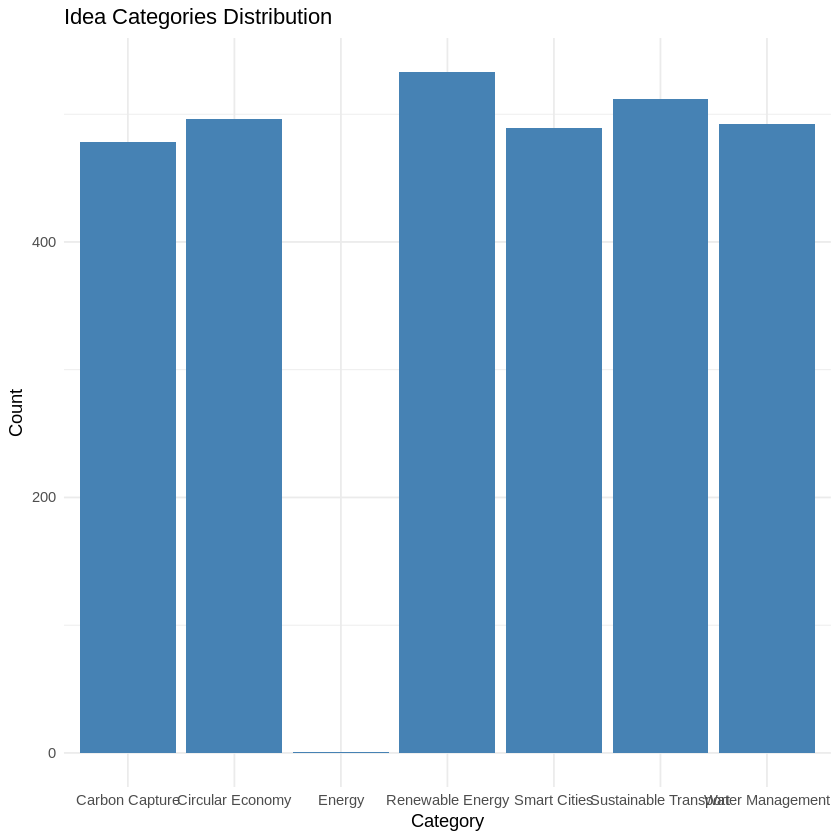

In [16]:
ggplot(data, aes(x = `Idea.Category`)) +
  geom_bar(fill = "steelblue") +
  labs(title = "Idea Categories Distribution", x = "Category", y = "Count") +
  theme_minimal()


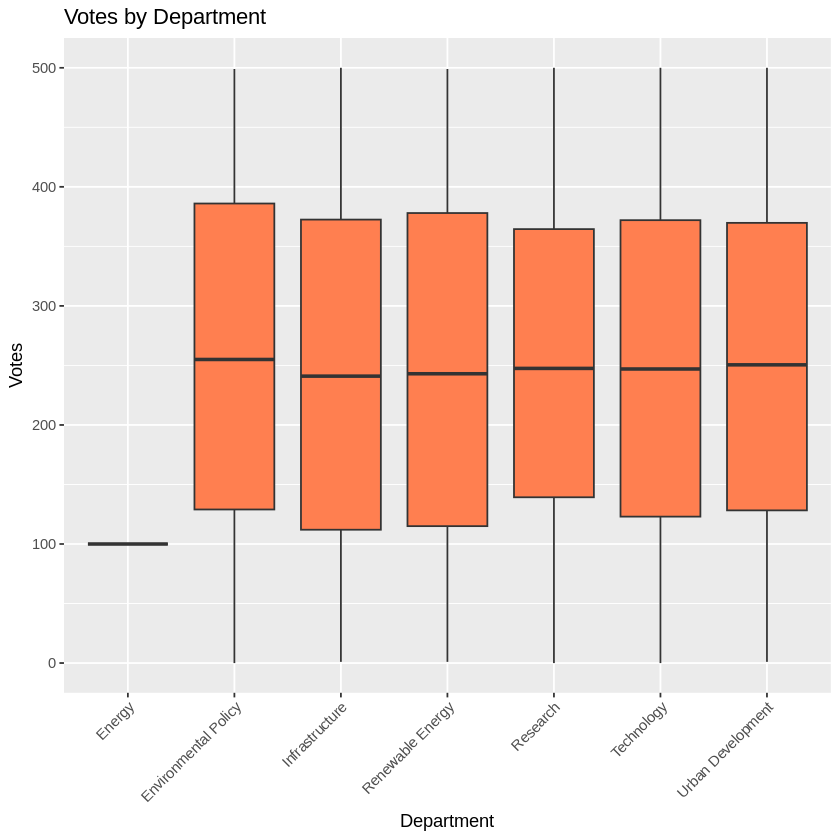

In [17]:
ggplot(data, aes(x = `Department`, y = `Number.of.Votes`)) +
  geom_boxplot(fill = "coral") +
  labs(title = "Votes by Department", x = "Department", y = "Votes") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

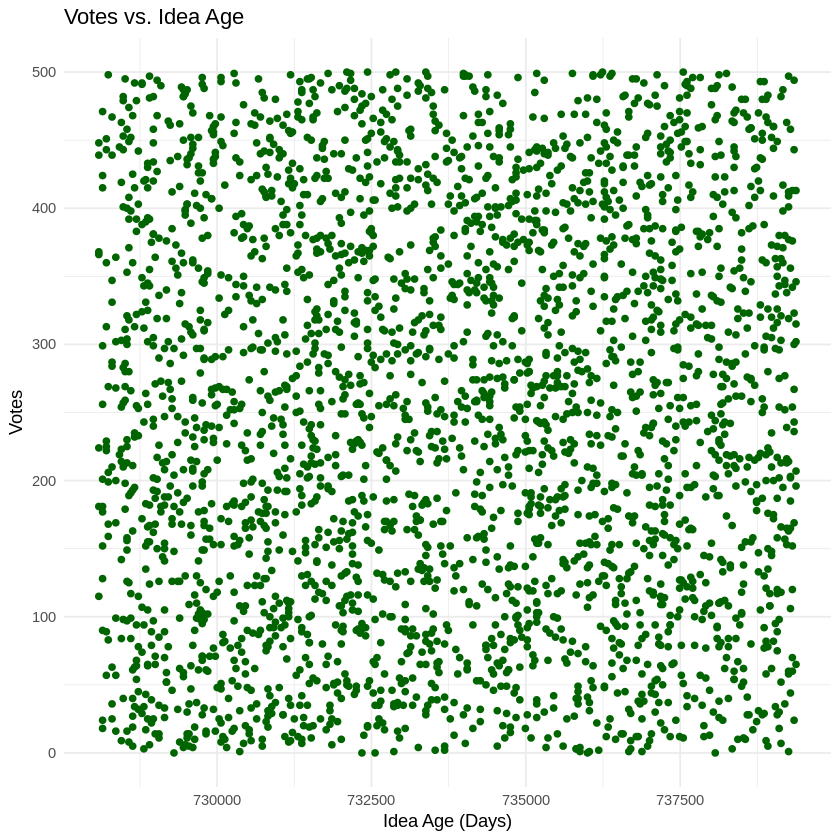

In [18]:
ggplot(clean_data, aes(x = idea_age_days, y = `Number.of.Votes`)) +
  geom_point(color = "darkgreen") +
  labs(title = "Votes vs. Idea Age", x = "Idea Age (Days)", y = "Votes") +
  theme_minimal()